# Get Top Tracks From Spotify Chart and Audio Features From Spotify API
## Part 01: Data Collection From Spotify Chart
### Import library

In [1]:
# import the usual Python library for data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Get Top 200 tracks from Spotify Chart
https://spotifycharts.com/regional/global/daily/2017-11-05

In [2]:
# link to Spotify Chart
url = 'https://spotifycharts.com/regional/global/daily/2017-11-05/download'

# get data as 'DataFrame' object
df = pd.read_csv(url)

# have quick look
df.head()

,Position,Track Name,Artist,Streams,URL
0,1,rockstar,Post Malone,5086329,https://open.spotify.com/track/7wGoVu4Dady5GV0...
1,2,Havana,Camila Cabello,4219170,https://open.spotify.com/track/0ofbQMrRDsUaVKq...
2,3,Too Good At Goodbyes,Sam Smith,3652071,https://open.spotify.com/track/1mXVgsBdtIVeCLJ...
3,4,New Rules,Dua Lipa,3295470,https://open.spotify.com/track/2ekn2ttSfGqwhha...
4,5,What Lovers Do (feat. SZA),Maroon 5,2994195,https://open.spotify.com/track/4nYsmWkuTaowTMy...


We have five columns **Position**, **Track Name**, **Artist**, **Streams**, and **URL** from Spotify Chart.

### Simple exploratory data analysis
Let's see who has the most songs listed in Top 200 on **2017-11-05**.

In [3]:
df.Artist.value_counts().head(10)

Sam Smith          16
Ed Sheeran          7
Post Malone         6
21 Savage           4
Taylor Swift        4
XXXTENTACION        4
J Balvin            3
Imagine Dragons     3
Charlie Puth        3
Ozuna               3
Name: Artist, dtype: int64

Looks like **Sam Smith** is the superstar on **Nov. 05**. How about the **total number of streams** this time?

In [4]:
df.groupby(['Artist'])['Streams'].sum().sort_values(ascending=False).head(10)

Artist
Sam Smith         14160873
Post Malone       10948100
Ed Sheeran         7242014
Camila Cabello     4650867
J Balvin           4108988
21 Savage          3899862
Maroon 5           3722522
Charlie Puth       3609415
Taylor Swift       3488365
Dua Lipa           3295470
Name: Streams, dtype: int64

It seems like **Sam Smith** and **Post Malone** made lots of money from Spotify. Cool!!!

## Part 02: Extracting Audio Features From Spotify API
### Get Spotify ID
In order to obtain **[audio features](https://developer.spotify.com/web-api/get-audio-features/)** from Spotify for further interesting analysis, we need to have a **[Spotify ID](https://developer.spotify.com/web-api/user-guide/#spotify-uris-and-ids)** of a track or song. Fortunately, Spotify ID is the last few characters of the URL in our DataFrame, so we don't have to look up Spotify ID for each song. Instread, all we need to do is some string operation.

In [5]:
# get Spotify ID
df['Spotify_ID'] = df.apply(lambda row: row['URL'].split('/')[-1], axis=1)

# have a quick look
df.head()

,Position,Track Name,Artist,Streams,URL,Spotify_ID
0,1,rockstar,Post Malone,5086329,https://open.spotify.com/track/7wGoVu4Dady5GV0...,7wGoVu4Dady5GV0Sv4UIsx
1,2,Havana,Camila Cabello,4219170,https://open.spotify.com/track/0ofbQMrRDsUaVKq...,0ofbQMrRDsUaVKq2mGLEAb
2,3,Too Good At Goodbyes,Sam Smith,3652071,https://open.spotify.com/track/1mXVgsBdtIVeCLJ...,1mXVgsBdtIVeCLJnSnmtdV
3,4,New Rules,Dua Lipa,3295470,https://open.spotify.com/track/2ekn2ttSfGqwhha...,2ekn2ttSfGqwhhate0LSR0
4,5,What Lovers Do (feat. SZA),Maroon 5,2994195,https://open.spotify.com/track/4nYsmWkuTaowTMy...,4nYsmWkuTaowTMy4gskmBw


The last column **Spotify_ID** is the specific code that allows us to extract music propreties or audio features from Spotfy API.

### Connect to Spotify API via spotipy
Before getting any audio features, we need 
- Python package [spotipy](https://github.com/plamere/spotipy) to help us connect to Spotify API. (spoty-**py** not spoti-**fy**)
- **client id** and **client secret** from [Spotify Developer](https://developer.spotify.com/my-applications/#!/).

Once having the **spotipy** package installed and a set of client id and client secret, we can continue on

In [6]:
# import libaray from spotify
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [7]:
# setup Spotify client ID and password
client_id = 'YOUR ID HERE'
client_secret = 'YOUR PASSWORD HERE'

# connect to Spotify API via spotipy package 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### Get audio features
Let's use the first Spotify ID to take a quick look at what kinds of features does Spotify offer. To do this, we can use the function **audio_features** from **spotipy**.

In [8]:
# use Spotify ID of the first song
this_id = df.Spotify_ID[0]

# take a look for audio features of the first song
sp.audio_features(this_id)[0]

{'acousticness': 0.13,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7wGoVu4Dady5GV0Sv4UIsx',
 'danceability': 0.577,
 'duration_ms': 218320,
 'energy': 0.522,
 'id': '7wGoVu4Dady5GV0Sv4UIsx',
 'instrumentalness': 9.03e-05,
 'key': 5,
 'liveness': 0.142,
 'loudness': -6.594,
 'mode': 0,
 'speechiness': 0.0984,
 'tempo': 159.772,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/7wGoVu4Dady5GV0Sv4UIsx',
 'type': 'audio_features',
 'uri': 'spotify:track:7wGoVu4Dady5GV0Sv4UIsx',
 'valence': 0.119}

Wow, Spotify provides lots of interesting audio features of a song!!

Personally, I think most of the top songs are quite like **Party Songs** in recent years. So let's extract the audio feature **danceability**.

In [9]:
# get the audio feature 'danceability' for every song 
# (this will take a few minutes since Spotify limit the speed for us to get the data)
df['danceability'] = df.apply(lambda row: sp.audio_features(row['Spotify_ID'])[0]['danceability'], axis=1)

# have a quick look
df.head()

,Position,Track Name,Artist,Streams,URL,Spotify_ID,danceability
0,1,rockstar,Post Malone,5086329,https://open.spotify.com/track/7wGoVu4Dady5GV0...,7wGoVu4Dady5GV0Sv4UIsx,0.577
1,2,Havana,Camila Cabello,4219170,https://open.spotify.com/track/0ofbQMrRDsUaVKq...,0ofbQMrRDsUaVKq2mGLEAb,0.768
2,3,Too Good At Goodbyes,Sam Smith,3652071,https://open.spotify.com/track/1mXVgsBdtIVeCLJ...,1mXVgsBdtIVeCLJnSnmtdV,0.698
3,4,New Rules,Dua Lipa,3295470,https://open.spotify.com/track/2ekn2ttSfGqwhha...,2ekn2ttSfGqwhhate0LSR0,0.756
4,5,What Lovers Do (feat. SZA),Maroon 5,2994195,https://open.spotify.com/track/4nYsmWkuTaowTMy...,4nYsmWkuTaowTMy4gskmBw,0.792


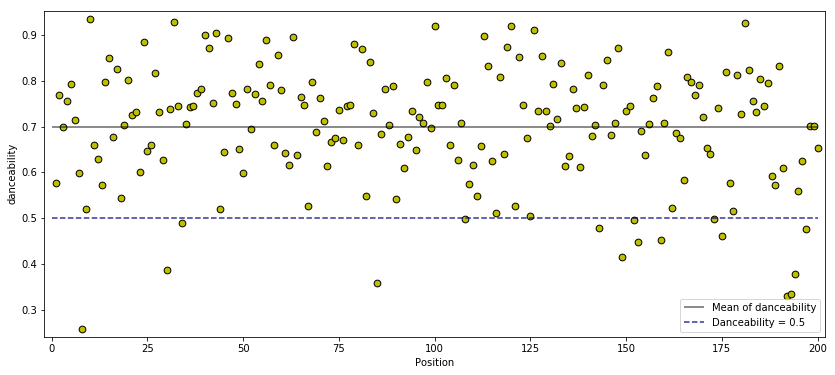

In [10]:
# scatterplot for danceability across 200 songs
df.plot('Position', 'danceability', kind='scatter', figsize=(14,6), marker='o', s=45, color='y', edgecolors='k')

# add averaged danceability
plt.hlines(df.danceability.mean(), 0, 200, alpha=.6, label='Mean of danceability')

# add 0.5 line
plt.hlines(.5, 0, 200, alpha=.8, color='navy', linestyles='dashed', label='Danceability = 0.5')

# set properties
plt.legend()
plt.margins(.01)
plt.show()

According to Spotify API [documentation](https://developer.spotify.com/web-api/get-audio-features/),

> *Danceability describes how suitable a track is for dancing... A value of 0.0 is least danceable and 1.0 is most danceable.*

From the above scatterplot, we can see that most of the top songs having **danceability** higher than 0.5, which shows that people who using Spotfy like high danceability songs.

Happy Data Analyzing!!!